# Seaborn 101


In [2]:
# Prerequisites
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Joint Plot from built-in sample data

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


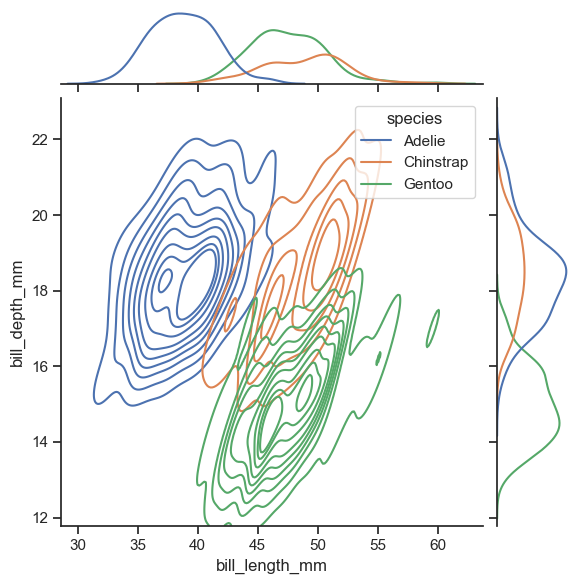

In [2]:
sns.set_theme(style="ticks")

# Load sample penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

## Histogram

In [7]:
# Load data
df = pd.read_csv("data/wages.csv")
print("Wage data:")
df.head()

Wage data:


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [9]:
df_age = df["age"]
print("type of age sample data: ", type(df_age))
print("Number of age samples: ", df_age.size)
df_age.head()

type of age sample data:  <class 'pandas.core.series.Series'>
Number of age samples:  3000


0    18
1    24
2    45
3    43
4    50
Name: age, dtype: int64

Text(0.5, 1.0, 'Meam, Median, and Mode of Age Data')

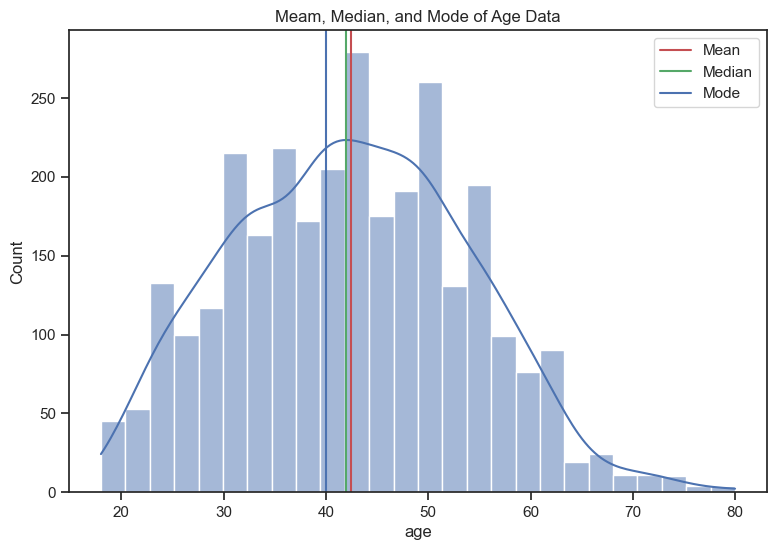

In [10]:
# Plot of the data as historgram and add mean, median, and mode vertical lines

# scipy (expands NumPy) has a method for Mode.
from scipy import stats

age_mean = df_age.mean()
age_median = df_age.median()
# mode function returns both the count and the mode
age_mode = stats.mode(df_age).mode

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Plot histogram with Seaborn
sns.histplot(df_age, kde=True) 

# Add median, mean, and mode
ax.axvline(x=age_mean, color='r', label="Mean")
ax.axvline(x=age_median, color='g', label="Median")
ax.axvline(x=age_mode, color='b', label="Mode")
ax.legend()
ax.set_title("Meam, Median, and Mode of Age Data")

Text(0.5, 1.0, 'Mean, Median and Mode of a age  data')

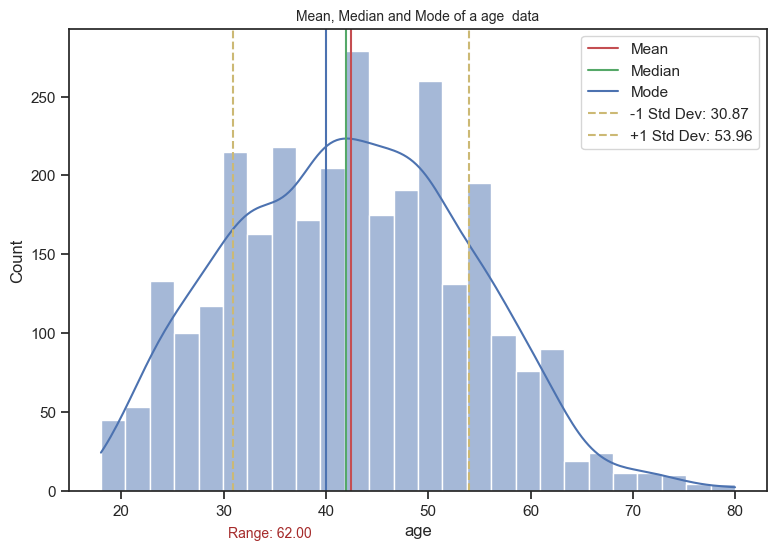

In [11]:
# Add standard deviation and range to the chart

age_mean = df_age.mean()
age_median = df_age.median()
age_mode = stats.mode(df_age).mode

# Compute range, variance, and standard deviation
age_range = max(df_age)-min(df_age)
age_variance = stats.tvar(df_age)
age_std_dev = stats.tstd(df_age)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
# Plot a histogram of the dataset using the seabron library
sns.histplot(df_age, kde=True)

# Add median, mean, and mode
ax.axvline(x=age_mean, color='r', label="Mean")
ax.axvline(x=age_median, color='g', label="Median")
ax.axvline(x=age_mode, color='b', label="Mode")

# Highlighting one standard deviation around the mean
ax.axvline(x=age_mean - age_std_dev, color='y', linestyle='--',
           label=f"-1 Std Dev: {age_mean - age_std_dev:.2f}")
ax.axvline(x=age_mean + age_std_dev, color='y', linestyle='--',
           label=f"+1 Std Dev: {age_mean + age_std_dev:.2f}")

# Figure out position for range label; e.g. instance,20% from the left and 
# just below the x-axis.
x_pos = min(df_age) + 0.20 * (max(df_age) - min(df_age))
# This places the text slightly below the x-axis
y_pos = -0.1 * ax.get_ylim()[1]

# Display the range text
range_txt = f"Range: {age_range:.2f}"
ax.text(x_pos, y_pos, range_txt, fontsize=10, ha='left', color='brown')


ax.legend()
ax.set_title("Mean, Median and Mode of a age  data", fontsize=10)

### Lineplot

In [13]:
# Extract number from education string with a regular expression
df["years_of_education"] = df["education"].str.extract(r'(\d+)').astype(int)
print(df["years_of_education"].head())
df["years_of_education"].describe()

0    1
1    4
2    3
3    4
4    2
Name: years_of_education, dtype: int64


count    3000.000000
mean        3.010000
std         1.215618
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: years_of_education, dtype: float64

<Axes: xlabel='years_of_education', ylabel='wage'>

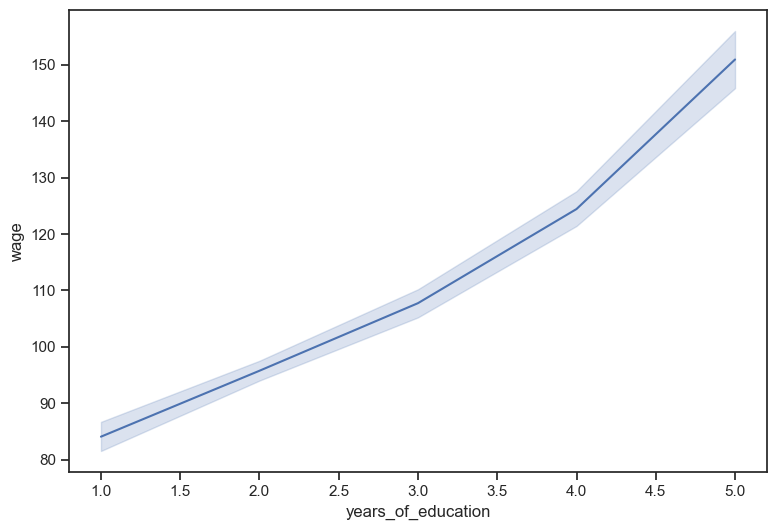

In [15]:
# Plot a line plot with Seaborn
fig, ax = plt.subplots(1, 1, figsize=(9,6))

sns.lineplot(x="years_of_education", y="wage", data=df)


## Scatter Plot

<Axes: xlabel='age', ylabel='wage'>

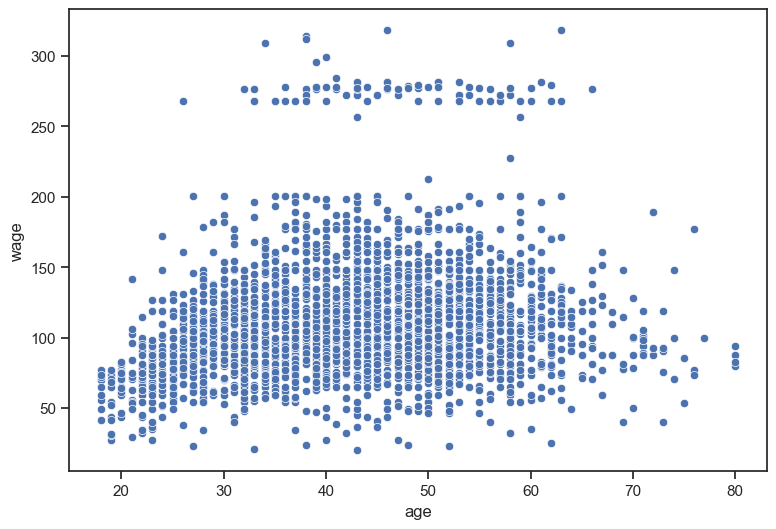

In [16]:
# Scatter Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
# Plot a histogram of the dataset using the seabron library
sns.scatterplot(x="age", y="wage", data=df)

## Pair Plot

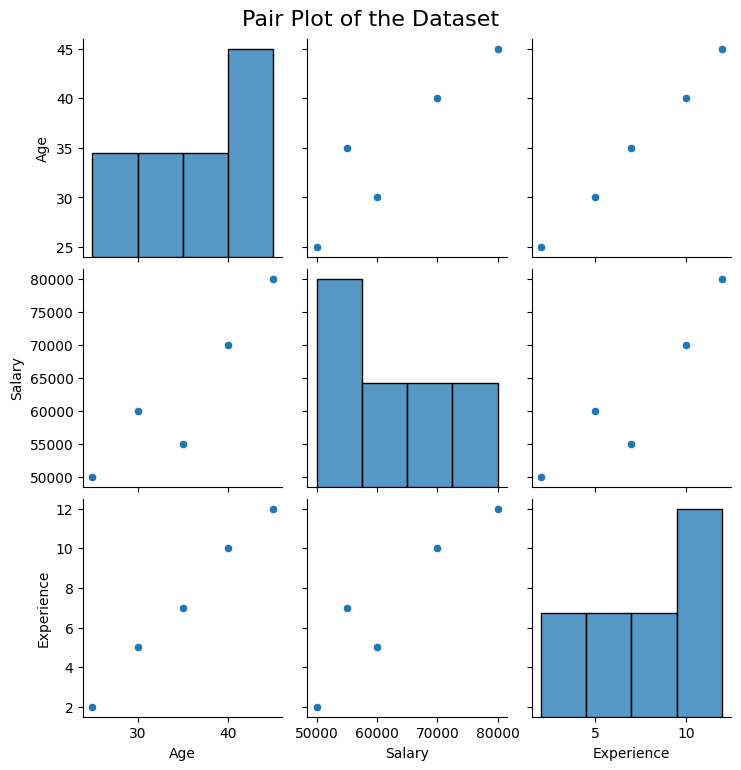

In [ ]:

# Sample DataFrame
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 55000, 70000, 80000],
    'Experience': [2, 5, 7, 10, 12]
}
df = pd.DataFrame(data)

# Generate a pair plot
sns.pairplot(df)

# Show the plot
plt.suptitle("Pair Plot of the Dataset", y=1.02, fontsize=16)
plt.show()


## Correclation Heatmap

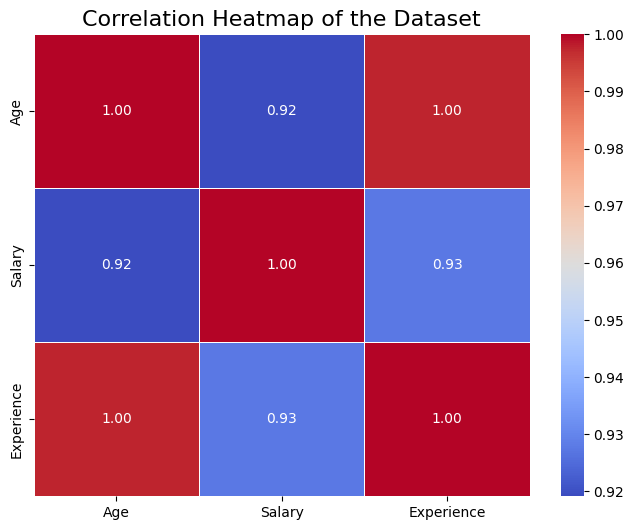

In [4]:
# Example DataFrame
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 55000, 70000, 80000],
    'Experience': [2, 5, 7, 10, 12]
}
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap of the Dataset", fontsize=16)
plt.show()
